## SGD setup (using $L^2$ norm) for a MKVSDE with polynomial drift

Consider a McKean-Vlasov (MKV) SDE of the following form:

\begin{equation}
\textrm{d}X_t = \bigl(\rho X_t + \mathbb{E}[X_t] - X_t \mathbb{E}[X^2_t] \bigr) \textrm{d} t + X_t \, \textrm{d} W_t, \quad X_0 = x_0.
\end{equation}

We approximate the solution $X_t, t \in [0,T]$ by using a polynomial approximation for the function $\mathbb{E}[X_t]$ and $\mathbb{E}[X^2_t)].$ In particular we use $\widehat{\gamma}_{1,k}, k=1,\ldots,n,$ as the value of $\mathbb{E}[X_t]$ for $t \in \{t_1, \ldots, t_n\},$ and $\widehat{\gamma}_{2,k}, k=1,\ldots,n,$ as the value of $\mathbb{E}[X^2_t]$ for $t \in \{t_1, \ldots, t_n\},$ where the values $\{t_1, \ldots, t_n\},$ are either Chebychev or Lagrange nodes in the time interval $[0, T].$ The process with polynomial function approximation is generated as:

\begin{align}
\textrm{d}Z_t = \bigl(\beta Z_t + \sum^{n}_{k=1} \widehat{\gamma}_{1,k} \prod_{\substack{ 1\leq j \leq n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  -  Z_t \sum^{n}_{k=1} \widehat{\gamma}_{2,k} \prod_{\substack{ 1\leq j \leq n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \bigr) \textrm{d} t + Z_t \, \textrm{d} W_t, \quad Z_0 = x_0.
\end{align}

The gradient processes $\xi^k_{1,t}:= \partial_{\widehat{\gamma}_{1,k}}Z_t$ and $\xi^k_{2,t}:= \partial_{\widehat{\gamma}_{2,k}}Z_t$ for $k = 1, \ldots, n,$ are given as
\begin{align}
    \textrm{d}\xi^k_{1,t} &= \bigl(\beta \xi^k_{1,t} + \prod_{\substack{ 1\leq j \leq n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}-\xi^k_{1,t} \sum^{n}_{k=1} \widehat{\gamma}_{2,k} \prod_{\substack{ 1\leq j \leq n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}\bigr) \textrm{d} t + \xi^k_{1,t}\, \textrm{d} W_t, \quad \xi^k_{1,0} = 0,\\
    \textrm{d}\xi^k_{2,t} &= \bigl(\beta \xi^k_{2,t} -\xi^k_{2,t} \sum^{n}_{k=1} \widehat{\gamma}_{2,k} \prod_{\substack{ 1\leq j \leq n \\ k\neq j}} \frac{t-t_j}{t_k - t_j} - Z_t \prod_{\substack{ 1\leq j \leq n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}\bigr) \textrm{d} t  + \xi^k_{2,t}\, \textrm{d} W_t, \quad \xi^k_{2,0} = 0.
\end{align}
    
We disretise the time interval $[0, T]$ uniformly into $M + 1$ steps, and insert Chebychev nodes to create a final time grid with $M+n$ (at most) intermediate points to generate discretised path of $Z$ and gradient processes. Our aim is to find the fixed-point of the map $\widehat{\Psi}^{(M+n)}$ defined as

\begin{align}
\widehat{\Psi}^{(M+n)}(\widehat{\gamma}):= \mathcal{P}\Bigl(\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)\Bigr).
\end{align}

In the above, we denote $\mathcal{L}$ as the lifting operator and $\mathcal{P}$ as the projection operator. In the linear MKV-SDE considered here, we have $\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)(t) = \bigl(\mathbb{E}[Z^{\mathcal{L}(\widehat{\gamma})}_t], \mathbb{E}[{Z^{\mathcal{L}(\widehat{\gamma})}_t}^2]\bigr).$ We compute the fixed-point by solving the following: 
\begin{align}
\min_{\widehat{\gamma}} \big| \mathcal{L}\Bigl(\widehat{\Psi}^{(M+n)}(\widehat{\gamma})\Bigr) - \mathcal{L}(\widehat{\gamma})\big|^2_{L^2([0,T])}.
\end{align}

More precisely, we write $\widehat{\gamma} = \{\widehat{\gamma}_{1,1}, \ldots, \widehat{\gamma}_{1,n},\widehat{\gamma}_{2,1}, \ldots, \widehat{\gamma}_{2,n}\}.$ Then, 
\begin{align}
(\mathcal{L}(\widehat{\gamma}))_{l=1,2}(t) = \sum^{n}_{k=1} \widehat{\gamma}_{l,k} \prod_{\substack{ 1\leq j \leq n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}.
\end{align}
The above notation gives us 
\begin{align}
 \big(  \mathcal{L}\widehat\gamma - \mathcal{L} \widehat{\Psi}^{(M+n)}(\widehat\gamma) \big)_1(t) &= \mathbb{E}\bigg[ \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k \neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)   \Big( Z^{\mathcal{L}\widehat \gamma}_{t_k}  -  \widehat\gamma_{1,k} \Big) \bigg],\\
 \big(  \mathcal{L}\widehat\gamma - \mathcal{L} \widehat{\Psi}^{(M+n)}(\widehat\gamma) \big)_2(t) &= \mathbb{E}\bigg[ \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k \neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)   \Big( (Z^{\mathcal{L}\widehat \gamma}_{t_k})^2  -  \widehat\gamma_{2,k} \Big) \bigg],\\
\end{align}

In order to perform stochastic gradient descent, we need to define the following.

\begin{align}
F_{1}(\hat\gamma;t, W) &:= \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)   \Big(Z^{\mathcal{L}\widehat{\gamma}}_{t_k} - \widehat{\gamma}_{1,k} \Big),\\
F_{2}(\hat\gamma;t, W) &:= \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)   \Big((Z^{\mathcal{L}\widehat{\gamma}}_{t_k})^2 - \widehat{\gamma}_{2,k} \Big),\\
\partial_{\hat\gamma_{1,m}} F_{1}(\hat\gamma;t, W) &= \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)  \Big(
\xi^{m}_{1,t_{k}} (\hat\gamma) - \delta_{k}(m) \Big), \quad m = 1, \ldots, n,\\
\partial_{\hat\gamma_{1,m}} F_{2}(\hat\gamma;t, W) &= \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)  \Big(
2 Z^{\mathcal{L}(\hat \gamma)}_{t_k} \cdot \xi^{m}_{1,t_{k}} (\hat\gamma)\Big), \quad m = 1, \ldots, n,\\
\partial_{\hat\gamma_{2,m}} F_{1}(\hat\gamma;t, W) &= \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)  \Big(\xi^{m}_{2,t_{k}} (\hat\gamma)\Big), \quad m= 1, \ldots, n,\\
\partial_{\hat\gamma_{2,m}} F_{2}(\hat\gamma;t, W) &= \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)  \Big(
2 Z^{\mathcal{L}(\hat \gamma)}_{t_k} \cdot \xi^{m}_{2,t_{k}} (\hat\gamma) - \delta_{k}(m) \Big), \quad m= 1, \ldots, n.
\end{align}

The Jacobian matrix is then given as 
    \begin{equation}
        J_{\widehat{\gamma}}F = \begin{bmatrix}
                                \nabla^\top F_1(\widehat{\gamma}, W) \\
                                \nabla^\top F_{2}(\widehat{\gamma}, W)
                                \end{bmatrix}
                                = \begin{bmatrix}
                                    \frac{\partial F_1}{\partial \widehat{\gamma}_{1,1}} \ldots \frac{\partial F_1}{\partial \widehat{\gamma}_{2,n}}\\
                                    \frac{\partial F_{2K}}{\partial \widehat{\gamma}_{1,1}} \ldots \frac{\partial F_{2K}}{\partial \widehat{\gamma}_{2,n}}\\
                                    \end{bmatrix}
                               = \begin{bmatrix}
                                   \mathcal{L}\bigl(\xi^1_{1} - \delta(1)\bigr) & \mathcal{L}\bigl(\xi^2_{1} - \delta(2)\bigr) & \ldots & \mathcal{L}\bigl(\xi^n_{1} - \delta(n)\bigr) & \mathcal{L}\bigl(\xi^1_{2}\bigr) & \ldots & \mathcal{L}\bigl(\xi^n_{2}\bigr)  \\
                                   \mathcal{L}\bigl(2 Z \xi^1_{1}\bigr) & \mathcal{L}\bigl(2 Z \xi^2_{1} \bigr) & \ldots & \mathcal{L}\bigl(2 Z \xi^n_{1}\bigr) & \mathcal{L}\bigl(2 Z \xi^1_{2} - \delta(1)\bigr) & \ldots & \mathcal{L}\bigl(2 Z\xi^n_{2}- \delta(n)\bigr) 
                               \end{bmatrix}.
    \end{equation}

To calculate the SGD step, we compute
\begin{align}
{\bf v} := 2 \int_0^T  F({\bf w};t,W) \cdot J_w F({\bf w};t, \tilde{W} ) \mathrm{d} t.
\end{align}
In the above, we have
\begin{equation}
F = \begin{bmatrix}
F_1(\widehat{\gamma}, W) & F_{2}(\widehat{\gamma}, W)
\end{bmatrix}
\end{equation}

Thus, we have for $m = 1, \ldots, n$
\begin{align}
{\bf v}_{m} &= 2 \int^T_0 F_1(\widehat{\gamma}, W) \mathcal{L}\bigl(\xi^m_{1} - \delta(m)\bigr) + F_{2}(\widehat{\gamma}, W)\mathcal{L}\bigl(2 Z \xi^m_{1}\bigr) \mathrm{d}t\\
&= 2 \int^T_0 \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)   \Big(Z^{\mathcal{L}\widehat{\gamma}}_{t_k}(W) - \widehat{\gamma}_{1,k} \Big) \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)  \Big(
\xi^{m}_{1,t_{k}} (\tilde W) - \delta_{k}(m) \Big) \mathrm{d} t \\
&+ 2 \int^T_0 \sum_{k=1}^n \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)   \Big((Z^{\mathcal{L}\widehat{\gamma}}_{t_k})^2(W) - \widehat{\gamma}_{2,k} \Big)  \sum_{k=1}^n  \Bigg(   \prod_{\substack{ 1\leqslant j \leqslant n \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \Bigg)  \Big(2 Z^{\mathcal{L}(\hat \gamma)}_{t_k}(\tilde W) \cdot \xi^{m}_{1,t_{k}} (\tilde W)\Big) \mathrm{d} t\\
&= 2 \sum_{i_1,i_2=0}^{n} \Big(Z^{\mathcal{L}\widehat \gamma}_{t_{i_1}}(W) - \widehat\gamma_{1,i_1}  \Big) \, 
\Big(\xi^{m}_{1,t_{{i_2}}} (\tilde W) - \delta_{i_2}(m) \Big) \beta_{i_1,i_2}  + 2 \sum_{i_1,i_2=0}^{n} \Big((Z^{\mathcal{L}\widehat \gamma}_{t_{i_1}})^2(W) - \widehat\gamma_{2,i_1}  \Big) \, 
\Big(2 Z^{\mathcal{L}(\hat \gamma)}_{t_{i_2}}(\tilde W) \cdot\xi^{m}_{1,t_{{i_2}}} (\tilde W) \Big) \beta_{i_1,i_2},
\end{align}
with $\beta_{i_1,i_2}$ given as 
\begin{align}
   \beta_{i_1,i_2} =\int_0^T  \bigg( \prod_{\substack{ 1\leqslant j \leqslant n \\ i_1\neq j}} \frac{t-t_j}{t_{i_1} - t_j}\bigg) \bigg(  \prod_{\substack{ 1\leqslant j \leqslant n \\ i_2\neq j}} \frac{t-t_j}{t_{i_2} - t_j} \bigg) \mathrm{d} t.
\end{align}

For $m = n+1, \ldots, 2n,$ we have 
\begin{align}
{\bf v}_{m} &= 2 \int^T_0 F_1(\widehat{\gamma}, W) \mathcal{L}\bigl(\xi^{m-n}_{2}\bigr) + F_{2}(\widehat{\gamma}, W)\mathcal{L}\bigl(2 Z \xi^{m-n}_{2} - \delta(m-n)\bigr) \mathrm{d}t\\
&= 2 \sum_{i_1,i_2=0}^{n} \Big(Z^{\mathcal{L}\widehat \gamma}_{t_{i_1}}(W) - \widehat\gamma_{1,i_1}  \Big) \, 
\Big(\xi^{m-n}_{2,t_{{i_2}}} (\tilde W) \Big) \beta_{i_1,i_2}  + 2 \sum_{i_1,i_2=0}^{n} \Big((Z^{\mathcal{L}\widehat \gamma}_{t_{i_1}})^2(W) - \widehat\gamma_{2,i_1}  \Big) \, 
\Big(2 Z^{\mathcal{L}(\hat \gamma)}_{t_{i_2}}(\tilde W) \cdot\xi^{m-n}_{2,t_{{i_2}}} (\tilde W)  - \delta_{i_2}(m-n)\Big) \beta_{i_1,i_2}.
\end{align}

The vector $\mathbf{v}$ can be computed by the following matrix operations.
\begin{align}
&\begin{bmatrix}
Z^{\mathcal{L}\widehat \gamma}_{t_{1}}(W) - \widehat\gamma_{1,1} & \ldots n-2 \ldots & Z^{\mathcal{L}\widehat \gamma}_{t_{1}}(W) - \widehat\gamma_{1,1} & (Z^{\mathcal{L}\widehat \gamma}_{t_{1}})^2(W) - \widehat\gamma_{2,1} & \ldots n-2 \ldots &(Z^{\mathcal{L}\widehat \gamma}_{t_{1}})^2(W) - \widehat\gamma_{2,1} \\
Z^{\mathcal{L}\widehat \gamma}_{t_{2}}(W) - \widehat\gamma_{1,2} & \ldots n-2 \ldots & Z^{\mathcal{L}\widehat \gamma}_{t_{2}}(W) - \widehat\gamma_{1,2} & (Z^{\mathcal{L}\widehat \gamma}_{t_{2}})^2(W) - \widehat\gamma_{2,2} & \ldots n-2 \ldots &(Z^{\mathcal{L}\widehat \gamma}_{t_{2}})^2(W) - \widehat\gamma_{2,2} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
Z^{\mathcal{L}\widehat \gamma}_{t_{n}}(W) - \widehat\gamma_{1,n} & \ldots n-2 \ldots & Z^{\mathcal{L}\widehat \gamma}_{t_{n}}(W) - \widehat\gamma_{1,n} & (Z^{\mathcal{L}\widehat \gamma}_{t_{n}})^2(W) - \widehat\gamma_{2,n} & \ldots n-2 \ldots &(Z^{\mathcal{L}\widehat \gamma}_{t_{n}})^2(W) - \widehat\gamma_{2,n}
\end{bmatrix}\\
& \cdot \begin{bmatrix}
\beta_{1,1} & \beta_{1,2} & \beta_{1,3} & \ldots & \beta_{1,n} & \beta_{1,1} & \beta_{1,2} & \ldots & \beta_{1,n}\\
\beta_{2,1} & \beta_{2,2} & \beta_{2,3} & \ldots & \beta_{2,n} & \beta_{2,1} & \beta_{2,2} & \ldots & \beta_{2,n}\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots\\
\beta_{n,1} & \beta_{n,2} & \beta_{n,3} & \ldots & \beta_{n,n} & \beta_{n,1} & \beta_{n,2} & \ldots & \beta_{n,n}
\end{bmatrix}\\
&\times \begin{bmatrix}
\xi^1_{1,t_{1}} - 1 & \xi^2_{1,t_{1}} & \ldots & \xi^1_{2,t_{1}} & \xi^2_{2,t_{1}} & \ldots \\
\xi^1_{1,t_{2}} & \xi^2_{1,t_{2}} - 1 & \ldots & \xi^1_{2,t_{2}} & \xi^2_{2,t_{2}} & \ldots \\
\xi^1_{1,t_{3}} & \xi^2_{1,t_{3}} & \ldots & \ldots & \ldots & \ldots \\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots \\
\xi^1_{1,t_{n}} & \xi^2_{1,t_{n}} & \ldots & \xi^1_{2,t_{n}} & \xi^2_{2,t_{n}} & \ldots\\
2 Z_{t_1} \xi^1_{1,t_{1}} & 2 Z_{t_1} \xi^2_{1,t_{1}} & \ldots & 2 Z_{t_1} \xi^1_{2,t_{1}} - 1 & 2 Z_{t_1} \xi^2_{2,t_{1}} & \ldots \\
\ldots & \ldots & \ldots & 2 Z_{t_2} \xi^1_{2,t_{2}} & 2 Z_{t_2} \xi^2_{2,t_{2}} - 1 & \ldots\\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots\\
2 Z_{t_n} \xi^1_{1,t_{n}} & 2 Z_{t_n} \xi^2_{1,t_{n}} & \ldots & 2 Z_{t_n} \xi^1_{2,t_{n}} & 2 Z_{t_n} \xi^2_{2,t_{n}} & \ldots
\end{bmatrix}
\end{align}

=\begin{align}
\begin{bmatrix}
\bigl(Z^{\mathcal{L}\widehat \gamma}_{t_{1}}(W)- \widehat\gamma_{1,1}\bigr) \sum^n_{i_2 = 1} \beta_{1,i_{2}} (\xi^1_{1,t_{i_2}} - \delta_{i_2}(1)) + \bigl((Z^{\mathcal{L}\widehat \gamma}_{t_{1}})^2(W) - \widehat\gamma_{2,1} \bigr)\sum^n_{i_2 = 1} 2 \beta_{1,i_{2}} Z_{t_{i_2}}(\tilde W)\xi^1_{1,t_{i_2}} (\tilde W) & \bigl(Z^{\mathcal{L}\widehat \gamma}_{t_{1}}(W)- \widehat\gamma_{1,1}\bigr) \sum^n_{i_2 = 1} \beta_{1,i_{2}} (\xi^2_{1,t_{i_2}} - \delta_{i_2}(2)) + \bigl((Z^{\mathcal{L}\widehat \gamma}_{t_{1}})^2(W) - \widehat\gamma_{2,1} \bigr)\sum^n_{i_2 = 1} 2 \beta_{1,i_{2}}  Z_{t_{i_2}}(\tilde W)\xi^2_{1,t_{i_2}} (\tilde W) & \ldots & \bigl(Z^{\mathcal{L}\widehat \gamma}_{t_{1}}(W)- \widehat\gamma_{1,1}\bigr) \sum^n_{i_2 = 1} \beta_{1,i_{2}}  \xi^1_{2,t_{i_2}}(\tilde W) + \bigl((Z^{\mathcal{L}\widehat \gamma}_{t_{1}})^2(W) - \widehat\gamma_{2,1} \bigr)\sum^n_{i_2 = 1} \beta_{1,i_{2}} \bigl(2 Z_{t_{i_2}}(\tilde W)\xi^1_{2,t_{i_2}} (\tilde W) - \delta_{i_2}(1) \bigr)& \ldots \\ 
\bigl(Z^{\mathcal{L}\widehat \gamma}_{t_{2}}(W)- \widehat\gamma_{1,2}\bigr) \sum^n_{i_2 = 1} \beta_{2,i_{2}} (\xi^1_{1,t_{i_2}} - \delta_{i_2}(1)) + \bigl((Z^{\mathcal{L}\widehat \gamma}_{t_{2}})^2(W) - \widehat\gamma_{2,2} \bigr)\sum^n_{i_2 = 1} 2 \beta_{2,i_{2}} Z_{t_{i_2}}(\tilde W)\xi^1_{1,t_{i_2}} (\tilde W) & \bigl(Z^{\mathcal{L}\widehat \gamma}_{t_{2}}(W)- \widehat\gamma_{1,2}\bigr) \sum^n_{i_2 = 1}\beta_{2,i_{2}} (\xi^2_{1,t_{i_2}} - \delta_{i_2}(2)) + \bigl((Z^{\mathcal{L}\widehat \gamma}_{t_{2}})^2(W) - \widehat\gamma_{2,2} \bigr)\sum^n_{i_2 = 1} 2\beta_{2,i_{2}} Z_{t_{i_2}}(\tilde W)\xi^2_{1,t_{i_2}} (\tilde W) & \ldots & \bigl(Z^{\mathcal{L}\widehat \gamma}_{t_{2}}(W)- \widehat\gamma_{1,2}\bigr) \sum^n_{i_2 = 1} \beta_{2,i_{2}} \xi^1_{2,t_{i_2}}(\tilde W) + \bigl((Z^{\mathcal{L}\widehat \gamma}_{t_{2}})^2(W) - \widehat\gamma_{2,2} \bigr)\sum^n_{i_2 = 1} \beta_{2,i_{2}}\bigl(2 Z_{t_{i_2}}(\tilde W)\xi^1_{2,t_{i_2}} (\tilde W) - \delta_{i_2}(1) \bigr)& \ldots \\ 
\vdots & \vdots & \ddots & \vdots & \ddots \\
\bigl(Z^{\mathcal{L}\widehat \gamma}_{t_{n}}(W)- \widehat\gamma_{1,n}\bigr) \sum^n_{i_2 = 1} \beta_{n,i_{2}} (\xi^1_{1,t_{i_2}} - \delta_{i_2}(1)) + \bigl((Z^{\mathcal{L}\widehat \gamma}_{t_{n}})^2(W) - \widehat\gamma_{2,n} \bigr)\sum^n_{i_2 = 1} 2 \beta_{n,i_{2}}Z_{t_{i_2}}(\tilde W)\xi^1_{1,t_{i_2}} (\tilde W) & \bigl(Z^{\mathcal{L}\widehat \gamma}_{t_{n}}(W)- \widehat\gamma_{1,n}\bigr) \sum^n_{i_2 = 1} \beta_{n,i_{2}}(\xi^2_{1,t_{i_2}} - \delta_{i_2}(2)) + \bigl((Z^{\mathcal{L}\widehat \gamma}_{t_{n}})^2(W) - \widehat\gamma_{2,n} \bigr)\sum^n_{i_2 = 1} 2 \beta_{n,i_{2}}Z_{t_{i_2}}(\tilde W)\xi^2_{1,t_{i_2}} (\tilde W) & \ldots & \bigl(Z^{\mathcal{L}\widehat \gamma}_{t_{n}}(W)- \widehat\gamma_{1,n}\bigr) \sum^n_{i_2 = 1} \beta_{n,i_{2}}\xi^1_{2,t_{i_2}}(\tilde W) + \bigl((Z^{\mathcal{L}\widehat \gamma}_{t_{n}})^2(W) - \widehat\gamma_{2,n} \bigr)\sum^n_{i_2 = 1} \beta_{n,i_{2}} \bigl(2 Z_{t_{i_2}}(\tilde W)\xi^1_{2,t_{i_2}} (\tilde W) - \delta_{i_2}(1) \bigr)& \ldots
\end{bmatrix}
\end{align}

Thus, if we take the sum of each column and multiply by scalar 2, we get $\mathbf{v}$ as the resulting row vector.

### Implementation of method with approximation using Chebychev nodes

#### *Import relevant libraries*

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import random
import time
import math
import numpy
from numpy import pi
import matplotlib.pyplot as plt

from matplotlib import rc # for TeX in plot labels
from scipy.integrate import quad # to compute the L2-norm weights

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

#### *Import plot libraries*

In [2]:
from res.plot_lib import plot_data, plot_model, set_default
set_default()

#### *Chebyvchev nodes*

In [3]:
def CC_nodes(a, b, n):
    i = numpy.array(range(n))
    x = numpy.cos((2 * i + 1) * pi /(2 * n))
    z = 0.5 * (b-a) * x + 0.5 * (b + a)
    return numpy.flip(z, 0)

#### *Parameters*

In [4]:
M = 50  # number of discretisation steps
n = 5  # number of Chebychev nodes
x0 = 1 # starting value
rho = 2.0 # constant in the SDE
T = 0.5 # time period
dt = T / M # time discretisation stepx
max_iter = 5 * 10 ** 4 # number of iterations of SGD
max_batch_iter = 5 * 10 ** 3 # number of iterations of batch SGD
BATCH_SIZE = 100 # batch size

#### *Compute time grid and factors in polynomial approximation*

In [5]:
tspace = numpy.linspace(0, T, M + 1, dtype=float) # discretisation points
tnodes = CC_nodes(0, T, n) # Chebychev nodes

# insert unique Chebychev nodes in the time grid based on M values
tspace = numpy.unique(numpy.concatenate((tspace, tnodes), axis=0))
tgrid_values = len(tspace) # number of steps in the final time

# identify the indices of Chebychev nodes in the time grid
tnodes_idx = numpy.zeros(n, dtype=int)
ctr = 0
for j in range(tgrid_values):
    if ctr < n: 
        if tnodes[ctr] == tspace[j]:
            tnodes_idx[ctr] = j
            ctr +=1 

# tgrid_values product values for K different Chebychev nodes
tspace_fact = numpy.ones((tgrid_values, n)) 
tnode_prod = numpy.zeros(n) # for computing the denominator in the factor

# compute products in the denominator of polynomial approxmiation factor
for k in range(n):
    temp_prod = tnodes[k] - numpy.delete(tnodes, k)
    tnode_prod[k] = numpy.prod(temp_prod)

# compute time factors in the polynomial approxmiation
for i in range(tgrid_values):
    for k in range(n):
        temp_prod = tspace[i] - numpy.delete(tnodes, k)
        tspace_fact[i][k] =  numpy.prod(temp_prod) / tnode_prod[k]

#### *Compute weights for the $L^2$ norm*

In [6]:
def integrand(tnodes, idx1, idx2, x):
    temp_prod1 = 1
    temp_prod2 = 1
    for i in range(n):
        if i != idx1:
            temp_prod1 = temp_prod1 * (x - tnodes[i]) / (tnodes[idx1] - tnodes[i])
            
        if i != idx2: 
            temp_prod2 = temp_prod2 * (x - tnodes[i]) / (tnodes[idx2] - tnodes[i])
   
    return temp_prod1 * temp_prod2

normwt = numpy.zeros((n,n))

for i in range(n):
    for j in range(n):
        normwt[i][j] = quad(lambda x: integrand(tnodes, i, j, x), 0, T)[0]

# Create a tiled matrix of size n x 2n with repetition of the weights
normwt_mat = numpy.tile(normwt, (1,2))

#### *Define MKV SDE class*

In [7]:
class MKVSDEpoly_approx():
    """
    An MKVSDE class with 3 types of paths:
        1. Underlying MKV path for computing the loss function with BM 1 (path)
        2. An independent MKV path for computing the jacobian with BM 2 (path_grad)
        3. Gradient process paths driven by BM 2 (grad)
    """
    
    def __init__(self, tgrid_values, n):
        super().__init__()
        self.path = numpy.zeros(tgrid_values) # sample path
        self.path_grad = numpy.zeros(tgrid_values) # sample path to be used for gradient process
        self.grad = numpy.zeros((2, n, tgrid_values)) # gradient processes
    
    def generatepath(self, x0, gamma, beta, tgrid_values, tspace, dW):
        self.path[0] = x0
        self.path_grad[0] = x0
        for i in range(tgrid_values-1):
            dt = tspace[i+1] - tspace[i]
            
            self.path[i+1] = self.path[i]  +  beta * self.path[i] * dt \
            + numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - self.path[i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + self.path[i] * dt ** 0.5 * dW[0][i]
            
            self.path_grad[i+1] = self.path_grad[i]  +  beta * self.path_grad[i] * dt \
            + numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - self.path_grad[i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + self.path_grad[i] * dt ** 0.5 * dW[1][i]
            
            self.grad[0,:,i+1] = self.grad[0,:,i]  + beta * self.grad[0,:,i] * dt \
                + tspace_fact[i] * dt \
                - self.grad[0,:,i] * numpy.dot(gamma[0], tspace_fact[i]) * dt \
                + self.grad[0,:,i] * dt ** 0.5 * dW[1][i]
            
            self.grad[1,:,i+1] = self.grad[1,:,i] + beta * self.grad[1,:,i] * dt \
                - self.path_grad[i] * tspace_fact[i] * dt \
                - self.grad[1,:,i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
                + self.grad[1,:,i] * dt ** 0.5 * dW[1][i]
                
class MKVSDEpolybatch_approx():
    """
    An MKVSDE class that has a batch of size BATCH_SIZE with 3 types of paths:
        1. Underlying MKV path for computing the loss function with BM 1 (path)
        2. An independent MKV path for computing the jacobian with BM 2 (path_grad)
        3. Gradient process paths driven by BM 2 (grad)
    """
    
    def __init__(self, tgrid_values, n, BATCH_SIZE):
        super().__init__()
        self.path = numpy.zeros((BATCH_SIZE, tgrid_values)) # sample path
        self.path_grad = numpy.zeros((BATCH_SIZE, tgrid_values)) # sample path to be used for gradient process
        self.grad = numpy.zeros((2, n, BATCH_SIZE, tgrid_values)) # gradient processes
    
    def generatebatch(self, x0, gamma, beta, tgrid_values, n, BATCH_SIZE, tspace, dW):
        self.path[:,0] = x0
        self.path_grad[:,0] = x0
        for i in range(tgrid_values-1):
            dt = tspace[i+1] - tspace[i]
            
            self.path[:,i+1] = self.path[:,i]  +  beta * self.path[:,i] * dt \
            + numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - self.path[:,i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + self.path[:,i] * dt ** 0.5 * dW[0,:,i]
            
            self.path_grad[:,i+1] = self.path_grad[:,i]  +  beta * self.path_grad[:,i] * dt \
            + numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - self.path_grad[:,i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + self.path_grad[:,i] * dt ** 0.5 * dW[1,:,i]
            
            self.grad[0,:,:,i+1] = self.grad[0,:,:,i]  + beta * self.grad[0,:,:,i] * dt \
                + numpy.transpose(numpy.tile(tspace_fact[i],(BATCH_SIZE,1))) * dt \
                - self.grad[0,:,:,i] * numpy.dot(gamma[0],tspace_fact[i]) * dt \
                + self.grad[0,:,:,i] * numpy.tile(dW[1,:,i],(n,1)) * dt ** 0.5 
            
            self.grad[1,:,:,i+1] = self.grad[1,:,:,i] + beta * self.grad[1,:,:,i] * dt \
                - numpy.outer(tspace_fact[i],self.path_grad[:,i]) * dt \
                - self.grad[1,:,:,i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
                + self.grad[1,:,:,i] * numpy.tile(dW[1,:,i],(n,1)) * dt ** 0.5 

#### *Compute Jacobian*

In [8]:
def poly_jacobian(X, nodes_idx, n_nodes):
    """
    Parameters
    ----------
    X : an instance of MKVSDEpoly_approx
    nodes_idx : indices corresponding to Chebychev nodes
    n_nodes: number of Chebychev nodes
   
    Returns
    -------
    Jacobian matrix corresponding to polynomial drift model
    """
    jacob1 = numpy.concatenate([numpy.ones(n_nodes), \
                                2 * X.path_grad[tnodes_idx]])
    jacob1 = numpy.transpose(numpy.tile(jacob1, (2*n_nodes,1))) 
    
    jacob2_1 = X.grad[0][0][nodes_idx]
    jacob2_2 = X.grad[1][0][nodes_idx]
    for i in range(n_nodes-1):
        jacob2_1 = numpy.vstack([jacob2_1, X.grad[0][i+1][nodes_idx]])
        jacob2_2 = numpy.vstack([jacob2_2, X.grad[1][i+1][nodes_idx]])
    jacob2_1 = numpy.transpose(jacob2_1)    
    jacob2_2 = numpy.transpose(jacob2_2)
    jacob2_1 = numpy.vstack([jacob2_1, jacob2_1])
    jacob2_2 = numpy.vstack([jacob2_2, jacob2_2])
    jacob2 = numpy.hstack([jacob2_1, jacob2_2])
    
    # element wise product
    jacobian = jacob1 * jacob2 
    jacobian = jacobian - numpy.eye(2*n_nodes)
    
    return jacobian

#### *Compute derivative of the L2 loss function*

In [9]:
def deriv_l2loss(X, gamma, wght_mat, nodes_idx, n_nodes):
    """
    Parameters
    ----------
    X : an instance of MKVSDEpolybatch_approx
    gamma : approximation of gamma from previous SGD step
    wght_mat : pre-computed weights to calculate the L2 norm
    nodes_idx : indices corresponding to Chebychev nodes
    n_nodes : number of Chebychev nodes
    
    Returns
    -------
    Derivative of the L2 loss function with respect to the gamma value vector
    """
    lossF1 = numpy.transpose(numpy.tile(X.path[tnodes_idx] - gamma[0], (n,1)))
    lossF2 = numpy.transpose(numpy.tile(X.path[tnodes_idx]**2 - gamma[1], (n,1)))
    lossF = numpy.hstack([lossF1, lossF2])
    
    lossl2F = lossF * wght_mat
    
    jacobian = poly_jacobian(X, tnodes_idx, n)
    lossl2mat = numpy.matmul(lossl2F, jacobian)
    lossl2 = numpy.sum(lossl2mat, 0)
    return 2 * lossl2

#### *Compute derivative of the L2 loss function using mini-batch*

In [10]:
def  deriv_batchl2loss(X, gamma, wght_mat, nodes_idx, n_nodes, BATCH_SIZE):
    """
    Parameters
    ----------
    X : a mini-batch of MKVSDEpolybatch_approx
    gamma : approximation of gamma from previous SGD step
    wght_mat : pre-computed weights to calculate the L2 norm
    nodes_idx : indices corresponding to Chebychev nodes
    n_nodes: number of Chebychev nodes
    BATCH_SIZE: mini-batch size
    
    Returns
    -------
    Derivative of the L2 loss function with respect to the gamma value vector using mini-batch of paths
    """
    jacobian_final = numpy.zeros((2*n_nodes,2*n_nodes))
    lossl2F_final  = numpy.zeros((n_nodes,2*n_nodes))
    for batch_idx in range(BATCH_SIZE):
        jacob1 = numpy.concatenate([numpy.ones(n_nodes), \
                                    2 * X.path_grad[batch_idx, tnodes_idx]])
        jacob1 = numpy.transpose(numpy.tile(jacob1, (2*n_nodes,1))) 

        jacob2_1 = X.grad[0,0,batch_idx,nodes_idx]
        jacob2_2 = X.grad[0,0,batch_idx,nodes_idx]
        for i in range(n_nodes-1):
            jacob2_1 = numpy.vstack([jacob2_1, X.grad[0][i+1][batch_idx][nodes_idx]])
            jacob2_2 = numpy.vstack([jacob2_2, X.grad[1][i+1][batch_idx][nodes_idx]])
        jacob2_1 = numpy.transpose(jacob2_1)    
        jacob2_2 = numpy.transpose(jacob2_2)
        jacob2_1 = numpy.vstack([jacob2_1, jacob2_1])
        jacob2_2 = numpy.vstack([jacob2_2, jacob2_2])
        jacob2 = numpy.hstack([jacob2_1, jacob2_2])

        # element wise product
        jacobian = jacob1 * jacob2 
        jacobian = jacobian - numpy.eye(2*n_nodes)
        jacobian_final = jacobian_final + jacobian
   
    for batch_idx in range(BATCH_SIZE):
        lossF1 = numpy.transpose(numpy.tile(X.path[batch_idx][tnodes_idx] - gamma[0], (n,1)))
        lossF2 = numpy.transpose(numpy.tile(X.path[batch_idx][tnodes_idx]**2 - gamma[1], (n,1)))
        lossF = numpy.hstack([lossF1, lossF2])
        lossl2F = lossF * wght_mat
        lossl2F_final = lossl2F_final + lossl2F
    
    lossl2mat = numpy.matmul((lossl2F_final / BATCH_SIZE) , (jacobian_final / BATCH_SIZE))
    lossl2 = numpy.sum(lossl2mat, 0)
    return lossl2

#### *SGD*

In [11]:
# seed initialise
random.seed(1881)

lr = 0.01 # learning rate
error_tol = 10 ** -5 # error tolerance
error = 1000 # not used inside SGD 
gamma = x0 * numpy.ones((2, n))
gamma_SGD = numpy.ones((2, n)) # store final values
Z = MKVSDEpoly_approx(tgrid_values, n)
gamma_aver = numpy.zeros((2, n))
dW = numpy.random.randn(max_iter,2,tgrid_values-1)

start_time = time.time()
ctr = 0 # iteration counter
while ctr < max_iter and error > error_tol:
    Z.generatepath(x0, gamma, rho, tgrid_values, tspace, dW[ctr])
    gamma_prev = gamma
    gamma_prev_SGD = numpy.concatenate([gamma_prev[0], gamma_prev[1]])
    gamma_SGD = gamma_prev_SGD - lr * deriv_l2loss(Z, gamma, normwt_mat, tnodes_idx, n)
    gamma = numpy.array([gamma_SGD[0:n],gamma_SGD[n:2*n]])
    gamma_aver += gamma

    if (ctr + 1) % 1000 == 0:
        print('Iteration: [{}/{}] '.format(ctr, max_iter))
    ctr += 1

gamma_SGD = gamma_aver / max_iter

SGD_run_time = float(time.time() - start_time)

print("---Run time for SGD algo: %f seconds ---" % SGD_run_time)

Iteration: [999/50000] 
Iteration: [1999/50000] 
Iteration: [2999/50000] 
Iteration: [3999/50000] 
Iteration: [4999/50000] 
Iteration: [5999/50000] 
Iteration: [6999/50000] 
Iteration: [7999/50000] 
Iteration: [8999/50000] 
Iteration: [9999/50000] 
Iteration: [10999/50000] 
Iteration: [11999/50000] 
Iteration: [12999/50000] 
Iteration: [13999/50000] 
Iteration: [14999/50000] 
Iteration: [15999/50000] 
Iteration: [16999/50000] 
Iteration: [17999/50000] 
Iteration: [18999/50000] 
Iteration: [19999/50000] 
Iteration: [20999/50000] 
Iteration: [21999/50000] 
Iteration: [22999/50000] 
Iteration: [23999/50000] 
Iteration: [24999/50000] 
Iteration: [25999/50000] 
Iteration: [26999/50000] 
Iteration: [27999/50000] 
Iteration: [28999/50000] 
Iteration: [29999/50000] 
Iteration: [30999/50000] 
Iteration: [31999/50000] 
Iteration: [32999/50000] 
Iteration: [33999/50000] 
Iteration: [34999/50000] 
Iteration: [35999/50000] 
Iteration: [36999/50000] 
Iteration: [37999/50000] 
Iteration: [38999/50000

#### *SGD with mini-batch*

In [ ]:
# seed initialise
random.seed(1881)

lr = 0.01 # learning rate
error_tol = 10 ** -5 # error tolerance
error = 1000 # not used inside SGD 
gamma = x0 * numpy.ones((2, n))
gamma_batchSGD = numpy.ones((2, n)) # store final values
Z = MKVSDEpolybatch_approx(tgrid_values, n, BATCH_SIZE)
gamma_batchaver = numpy.zeros((2, n))
dW = numpy.random.randn(max_batch_iter, 2, BATCH_SIZE, tgrid_values-1)
start_time = time.time()
ctr = 0 # iteration counter
while ctr < max_batch_iter and error > error_tol:
    Z.generatebatch(x0, gamma, rho, tgrid_values, n, BATCH_SIZE, tspace, dW[ctr])
    loss_grad  = deriv_batchl2loss(Z, gamma, normwt_mat, tnodes_idx, n, BATCH_SIZE)    
    gamma_prev = gamma
    gamma_prev_SGD = numpy.concatenate([gamma_prev[0], gamma_prev[1]])
    gamma_SGD = gamma_prev_SGD - lr * loss_grad
    
    gamma = numpy.array([gamma_SGD[0:n],gamma_SGD[n:2*n]])
    gamma_batchaver += gamma

    if (ctr + 1) % (10 * BATCH_SIZE) == 0:
        print('Iteration: [{}/{}] '.format(ctr, max_batch_iter))
    ctr += 1

gamma_batchSGD = gamma_batchaver / max_batch_iter

batchSGD_run_time = float(time.time() - start_time)

print("---Run time for mini-batch SGD algo: %f seconds ---" % batchSGD_run_time)

#### *Monte Carlo benchmark and polynomial function approximation*

In [12]:
N = 5 * 10 ** 6
ZMC1 = numpy.zeros(N)
ZMC1 = x0 # starting value
gamma_MC = numpy.zeros((2,tgrid_values))
gamma_MC[0, 0] = numpy.mean(ZMC1)
gamma_MC[1, 0] = numpy.mean(ZMC1 **2)
ZMC2 = numpy.zeros(N)

start_time = time.time()
for i in range(tgrid_values-1):
    dW = numpy.random.randn(N)
    dt = tspace[i+1] - tspace[i]
    ZMC2 = ZMC1  + rho * ZMC1 * dt + gamma_MC[0, i] * dt \
    - ZMC1 * gamma_MC[1, i] * dt \
    + ZMC1 * dt ** 0.5 * dW

    ZMC1 = ZMC2
    gamma_MC[0, i+1] = numpy.mean(ZMC1)
    gamma_MC[1, i+1] = numpy.mean(ZMC1 ** 2)

MC_run_time = float(time.time() - start_time)
print("---Run time for MC: %f seconds ---" % MC_run_time)

---Run time for MC: 17.815625 seconds ---


Text(0.5, 0.98, 'rho = 2.0, lr = 0.01, max_iter = 50000, M = 50, n = 5, T = 0.5')

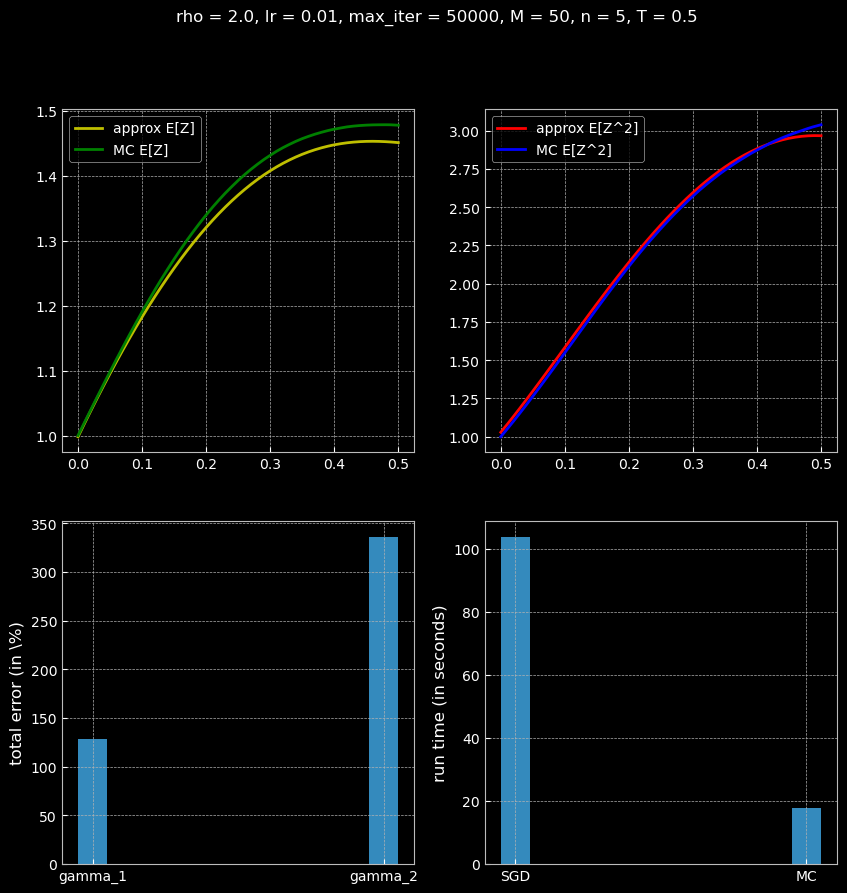

In [13]:
gamma_approx = numpy.zeros((2, tgrid_values))
for i in range(tgrid_values):
    gamma_approx[0, i] =  numpy.dot(gamma_SGD[0], tspace_fact[i]) 
    gamma_approx[1, i] =  numpy.dot(gamma_SGD[1], tspace_fact[i])
    
tot_err_gamma1 = (numpy.sum(numpy.abs(gamma_approx[0] - gamma_MC[0]))) * numpy.abs(numpy.mean(gamma_MC[0])) * 100
tot_err_gamma2 = (numpy.sum(numpy.abs(gamma_approx[1] - gamma_MC[1]))) * numpy.abs(numpy.mean(gamma_MC[1])) * 100
# plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)

x_err_bar = numpy.array(['gamma_1','gamma_2'])
y_err_bar = numpy.array([tot_err_gamma1,tot_err_gamma2])

x_runtime_bar = numpy.array(['SGD','MC'])
y_runtime_bar = numpy.array([SGD_run_time,MC_run_time])

ax1.plot(tspace, gamma_approx[0], 'y', label='approx E[Z]')
ax1.plot(tspace, gamma_MC[0], 'g', label='MC E[Z]')
ax2.plot(tspace, gamma_approx[1], 'r', label='approx E[Z^2]')
ax2.plot(tspace, gamma_MC[1], 'b', label='MC E[Z^2]')
ax1.legend()
ax2.legend()

ax3.bar(x_err_bar, y_err_bar, width=0.1, bottom=None, align='center')
ax3.set_ylabel('total error (in \%)')
ax4.bar(x_runtime_bar, y_runtime_bar, width=0.1, bottom=None, align='center')
ax4.set_ylabel('run time (in seconds)')
# plt.rc('text', usetex=False)
title_str = 'rho = ' + str(rho) + ', lr = ' + str(lr) + ', max_iter = ' + str(max_iter) + ', M = ' + str(M) + ', n = ' + str(n) + ', T = ' + str(T)
fig.suptitle(title_str)